In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
tweet = pd.read_csv('Data\election_day_tweets.csv', na_values=[' '])
tweet_with_loc = tweet.dropna(subset =['user.location']) # only keep those with location
tweet_with_loc['text'].head()

0    .@Lawrence @HillaryClinton Two first  @SenSchu...
1    My @latimesopinion op-ed on historic #Californ...
2    #Senate Wisconsin Senate Preview: Johnson vs. ...
3    If Rubio Wins and #Trump Loses in #Florida... ...
4    #Senate Wisconsin Senate Preview: Johnson vs. ...
Name: text, dtype: object

In [3]:
# get two data set, one for MA, one for WY
df1 = tweet_with_loc[tweet_with_loc['user.location'].str.contains(", MA")]
df2 = tweet_with_loc[tweet_with_loc['user.location'].str.contains(", HI")]
df3 = tweet_with_loc[tweet_with_loc['user.location'].str.contains(", VT")]
df4 = tweet_with_loc[tweet_with_loc['user.location'].str.contains(", RI")]
df5 = tweet_with_loc[tweet_with_loc['user.location'].str.contains(", CA")]

frames = [df1, df2, df3, df4, df5]
df_democ = pd.concat(frames)
df_democ['left'] = 1

In [4]:
df1 = tweet_with_loc[tweet_with_loc['user.location'].str.contains(", NE")]
df2 = tweet_with_loc[tweet_with_loc['user.location'].str.contains(", WY")]
df3 = tweet_with_loc[tweet_with_loc['user.location'].str.contains(", OK")]
df4 = tweet_with_loc[tweet_with_loc['user.location'].str.contains(", KS")]
df5 = tweet_with_loc[tweet_with_loc['user.location'].str.contains(", UT")]
df6 = tweet_with_loc[tweet_with_loc['user.location'].str.contains(", WV")]
df7 = tweet_with_loc[tweet_with_loc['user.location'].str.contains(", NO")]

frames = [df1, df2, df3, df4, df5, df6, df7]
df_rep = pd.concat(frames)
df_rep['left'] = 0
# republication group is smaller, therefore took more state, it could be that in republication state, users are more likely not allowing location funciton on twitter

In [5]:
frames = [df_democ, df_rep]
tweet_subgroup = pd.concat(frames)

In [6]:
df = tweet_subgroup.dropna(subset =['user.location']) # only keep those with location
df = df.reset_index().drop(['index'], axis=1) # reset index

df['text'].head()

0    .@laloalcaraz says VOTE! #election #2016 #POTU...
1    Third Continental Congress 4 guidance is an id...
2    @JohnnyBucc so now were going to get into a ta...
3    Congratulations Jeannette. I have some questio...
4    Encouraging invention and innovation https://t...
Name: text, dtype: object

In [7]:
from nltk.tokenize import WordPunctTokenizer
import re
tok = WordPunctTokenizer()
pat1 = r'@[A-Za-z0-9]+'
pat2 = r'https?://[A-Za-z0-9./]+'
combined_pat = r'|'.join((pat1, pat2))
def tweet_cleaner(text):

    stripped = re.sub(combined_pat, '', text)
    try:
        clean = stripped.decode("utf-8-sig").replace(u"\ufffd", "?")
    except:
        clean = stripped
    letters_only = re.sub("[^a-zA-Z]", " ", clean)
    lower_case = letters_only.lower()
    # During the letters_only process two lines above, it has created unnecessay white spaces,
    # I will tokenize and join together to remove unneccessary white spaces
    words = tok.tokenize(lower_case)
    return (" ".join(words)).strip()

testing = df.text[:100]
test_result = []
for t in testing:
    test_result.append(tweet_cleaner(t))
test_result

['says vote election potus senate house local',
 'third continental congress guidance is an idea whose time has come thank you for bringing it forward giving us',
 'so now were going to get into a talk about partisanship within congress john our argument and that statement are very different',
 'congratulations jeannette i have some questions about your voting record',
 'encouraging invention and innovation',
 'iot solutions world congress focused on testbeds collaboration iotswc industry barcelona industrie',
 'democrats see fbi controversy hurting chances in u s congress races',
 'pine and tudyk nail it how congress works',
 'national ramifications of fbi rigging election against donald trump than the two letters he sent to congress cc',
 'headed to colombia soon to speak nueva rd int l congress with amp',
 'prez hillary will deal with a congress that is a ravenous parliamentary beast determined traffic in investigations',
 'it s time kick some republican ass amp give hillary a congr

In [8]:
clean_tweet_texts = []
for i in range(0, df.count()[0]):
    clean_tweet_texts.append(tweet_cleaner(df['text'][i]))

In [9]:
clean_df = pd.DataFrame(clean_tweet_texts,columns=['text'])
clean_df['target'] = df.left


In [10]:
clean_df.head()

,text,target
0,says vote election potus senate house local,1
1,third continental congress guidance is an idea...,1
2,so now were going to get into a talk about par...,1
3,congratulations jeannette i have some question...,1
4,encouraging invention and innovation,1


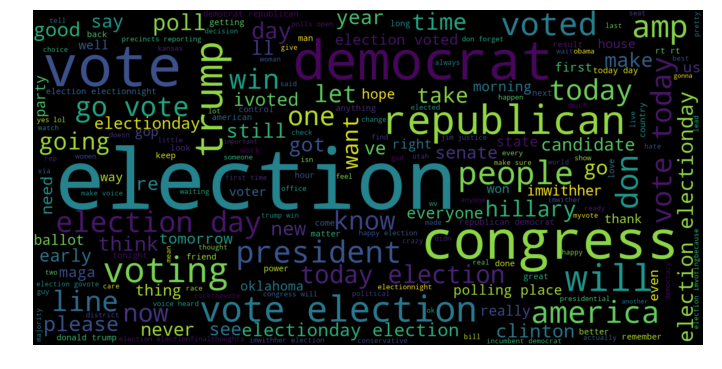

In [11]:
right_tweets = clean_df[clean_df.target == 0]
right_string = []
for t in right_tweets.text:
    right_string.append(t)
right_string = pd.Series(right_string).str.cat(sep=' ')
from wordcloud import WordCloud

wordcloud = WordCloud(width=1600, height=800,max_font_size=200).generate(right_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

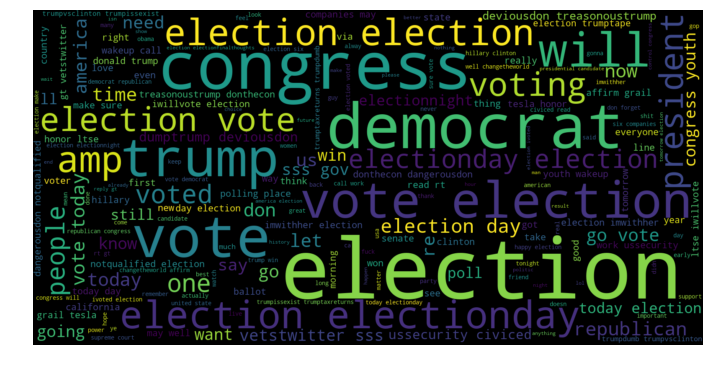

In [12]:
left_tweets = clean_df[clean_df.target == 1]
left_string = []
for t in left_tweets.text:
    left_string.append(t)
left_string = pd.Series(left_string).str.cat(sep=' ')
from wordcloud import WordCloud

wordcloud = WordCloud(width=1600, height=800,max_font_size=200).generate(left_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [13]:
# Vectorize, token, count frequency

In [14]:
from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer()
cvec.fit(clean_df.text) 

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [15]:
len(cvec.get_feature_names())

14092

In [31]:
rep_doc_matrix = cvec.transform(clean_df[clean_df.target == 0].text)
dem_doc_matrix = cvec.transform(clean_df[clean_df.target == 1].text)
rep_tf = np.sum(rep_doc_matrix,axis=0)
dem_tf = np.sum(dem_doc_matrix,axis=0)
rep = np.squeeze(np.asarray(rep_tf))
dem = np.squeeze(np.asarray(dem_tf))
term_freq_df = pd.DataFrame([rep,dem],columns=cvec.get_feature_names()).transpose()

In [32]:
term_freq_df.columns = ['rep', 'dem']
term_freq_df['total'] = term_freq_df['rep'] + term_freq_df['dem']
term_freq_df.sort_values(by='total', ascending=False).iloc[:10]

,rep,dem,total
election,1441,7834,9275
the,982,4963,5945
to,769,3667,4436
vote,616,2860,3476
and,538,2520,3058
congress,351,2262,2613
in,491,2063,2554
for,480,2015,2495
is,404,2004,2408
of,365,1930,2295


Text(0.5, 1.0, 'Top 500 tokens in tweets')

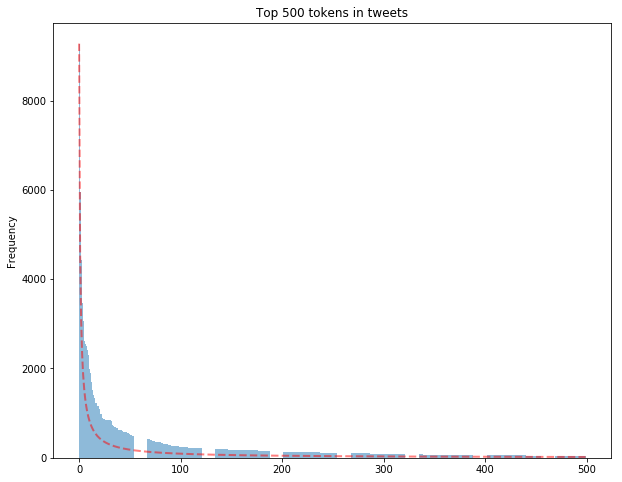

In [33]:
y_pos = np.arange(500) # Top 500 tokens
plt.figure(figsize=(10,8))
s = 1
expected_zipf = [term_freq_df.sort_values(by='total', ascending=False)['total'][0]/(i+1)**s for i in y_pos]
plt.bar(y_pos, term_freq_df.sort_values(by='total', ascending=False)['total'][:500], align='center', alpha=0.5)
plt.plot(y_pos, expected_zipf, color='r', linestyle='--',linewidth=2,alpha=0.5)
plt.ylabel('Frequency')
plt.title('Top 500 tokens in tweets')

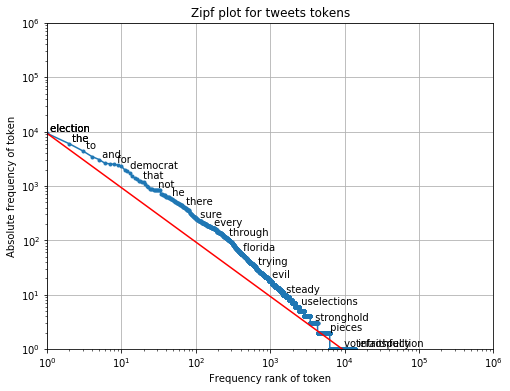

In [34]:
from pylab import *
counts = term_freq_df.total
tokens = term_freq_df.index
ranks = arange(1, len(counts)+1)
indices = argsort(-counts)
frequencies = counts[indices]
plt.figure(figsize=(8,6))
plt.ylim(1,10**6)
plt.xlim(1,10**6)
loglog(ranks, frequencies, marker=".")
plt.plot([1,frequencies[0]],[frequencies[0],1],color='r')
title("Zipf plot for tweets tokens")
xlabel("Frequency rank of token")
ylabel("Absolute frequency of token")
grid(True)
for n in list(logspace(-0.5, log10(len(counts)-2), 25).astype(int)):
    dummy = text(ranks[n], frequencies[n], " " + tokens[indices[n]], 
                 verticalalignment="bottom",
                 horizontalalignment="left")

In [42]:
np.shape(dem)[0]

13929

In [46]:
my_df = clean_df
from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer(stop_words='english',max_features=10000)
cvec.fit(my_df.text)
document_matrix = cvec.transform(my_df.text)


rep_batches = np.linspace(0,np.shape(rep)[0],10).astype(int)
i=0
rep_tf = []
while i < len(rep_batches)-1:
    batch_result = np.sum(document_matrix[rep_batches[i]:rep_batches[i+1]].toarray(),axis=0)
    rep_tf.append(batch_result)
    print (rep_batches[i+1],"entries' term freuquency calculated")
    i += 1

1547 entries' term freuquency calculated
3095 entries' term freuquency calculated
4643 entries' term freuquency calculated
6190 entries' term freuquency calculated
7738 entries' term freuquency calculated
9286 entries' term freuquency calculated
10833 entries' term freuquency calculated
12381 entries' term freuquency calculated
13929 entries' term freuquency calculated


In [47]:
dem_batches = np.linspace(np.shape(rep)[0],2*np.shape(rep)[0],10).astype(int)
i=0
dem_tf = []
while i < len(rep_batches)-1:
    batch_result = np.sum(document_matrix[dem_batches[i]:dem_batches[i+1]].toarray(),axis=0)
    dem_tf.append(batch_result)
    print (dem_batches[i+1],"entries' term freuquency calculated")
    i += 1

15476 entries' term freuquency calculated
17024 entries' term freuquency calculated
18572 entries' term freuquency calculated
20119 entries' term freuquency calculated
21667 entries' term freuquency calculated
23215 entries' term freuquency calculated
24762 entries' term freuquency calculated
26310 entries' term freuquency calculated
27858 entries' term freuquency calculated


In [50]:
rep = np.sum(rep_tf,axis=0)
dem = np.sum(dem_tf,axis=0)
term_freq_df2 = pd.DataFrame([rep,dem],columns=cvec.get_feature_names()).transpose()
term_freq_df2.columns = ['rep', 'dem']
term_freq_df2['total'] = term_freq_df2['rep'] + term_freq_df2['dem']
term_freq_df2.sort_values(by='total', ascending=False).iloc[:10]

,rep,dem,total
election,8874,401,9275
vote,3313,163,3476
congress,2541,72,2613
democrat,1730,160,1890
trump,1352,51,1403
today,1173,58,1231
electionday,1054,36,1090
day,802,48,850
republican,661,63,724
voted,649,29,678


Text(0.5, 1.0, 'Top 50 tokens in republication state tweets')

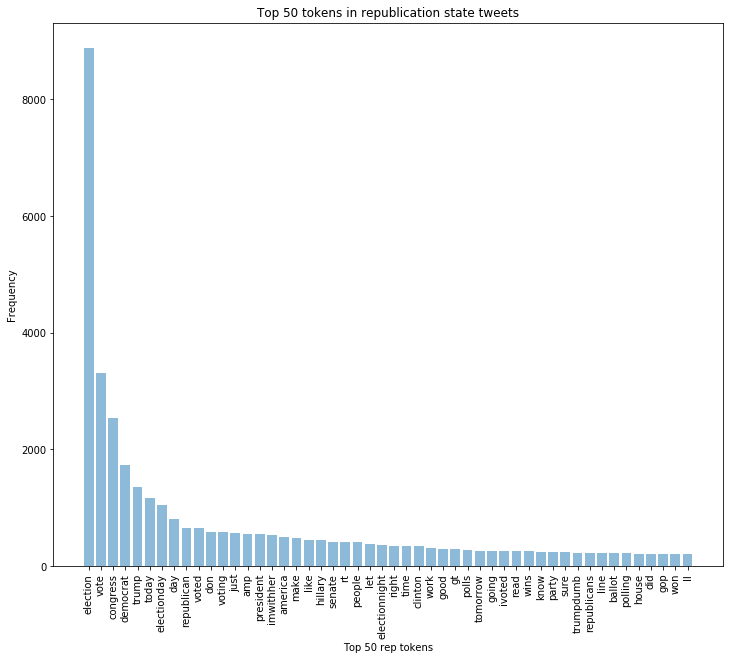

In [85]:
y_rep = np.arange(50)
plt.figure(figsize=(12,10))
plt.bar(y_rep, term_freq_df2.sort_values(by='rep', ascending=False)['rep'][:50], align='center', alpha=0.5)
plt.xticks(y_rep, term_freq_df2.sort_values(by='rep', ascending=False)['rep'][:50].index,rotation='vertical')
plt.ylabel('Frequency')
plt.xlabel('Top 50 rep tokens')
plt.title('Top 50 tokens in republication state tweets')



Text(0.5, 1.0, 'Top 50 tokens in positive tweets')

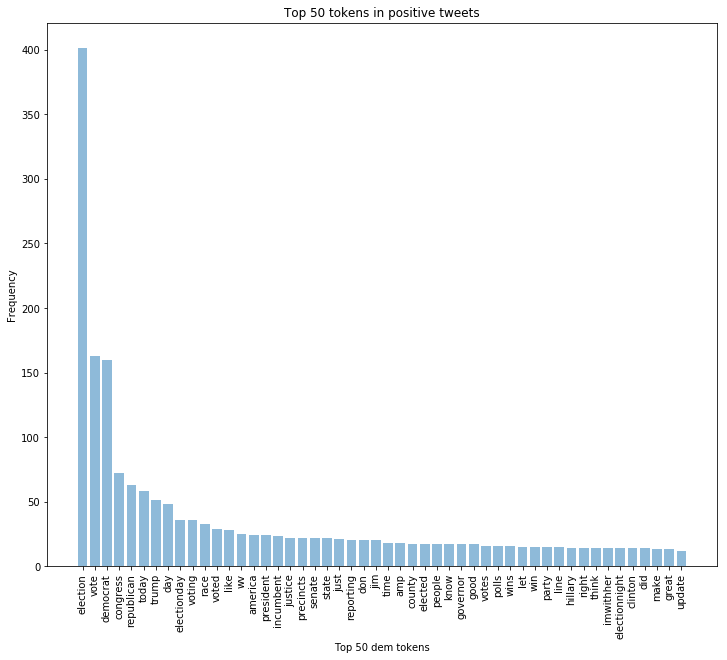

In [86]:
y_dem = np.arange(50)
plt.figure(figsize=(12,10))
plt.bar(y_dem, term_freq_df2.sort_values(by='dem', ascending=False)['dem'][:50], align='center', alpha=0.5)
plt.xticks(y_dem, term_freq_df2.sort_values(by='dem', ascending=False)['dem'][:50].index,rotation='vertical')
plt.ylabel('Frequency')
plt.xlabel('Top 50 dem tokens')
plt.title('Top 50 tokens in positive tweets')



Text(0.5, 1.0, 'rep Frequency vs dem Frequency')

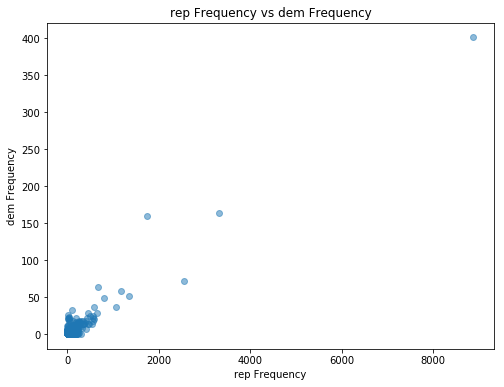

In [56]:
import seaborn as sns
plt.figure(figsize=(8,6))
ax = sns.regplot(x="rep", y="dem",fit_reg=False, scatter_kws={'alpha':0.5},data=term_freq_df2)
plt.ylabel('dem Frequency')
plt.xlabel('rep Frequency')
plt.title('rep Frequency vs dem Frequency')

In [57]:
term_freq_df2['dem_rate'] = term_freq_df2['dem'] * 1./term_freq_df2['total']
term_freq_df2.sort_values(by='dem_rate', ascending=False).iloc[:10]



,rep,dem,total,dem_rate
whereistheuproar,0,1,1,1.0
weber,0,1,1,1.0
sabotaging,0,1,1,1.0
sa,0,1,1,1.0
rushed,0,1,1,1.0
bracelet,0,1,1,1.0
charleston,0,4,4,1.0
stink,0,1,1,1.0
anderson,0,1,1,1.0
rowe,0,1,1,1.0


In [58]:

term_freq_df2['dem_freq_pct'] = term_freq_df2['dem'] * 1./term_freq_df2['dem'].sum()
term_freq_df2.sort_values(by='dem_freq_pct', ascending=False).iloc[:10]

,rep,dem,total,dem_rate,dem_freq_pct
election,8874,401,9275,0.043235,0.081256
vote,3313,163,3476,0.046893,0.033029
democrat,1730,160,1890,0.084656,0.032421
congress,2541,72,2613,0.027555,0.014590
republican,661,63,724,0.087017,0.012766
today,1173,58,1231,0.047116,0.011753
trump,1352,51,1403,0.036351,0.010334
day,802,48,850,0.056471,0.009726
electionday,1054,36,1090,0.033028,0.007295
voting,581,36,617,0.058347,0.007295


In [59]:
from scipy.stats import hmean

term_freq_df2['dem_hmean'] = term_freq_df2.apply(lambda x: (hmean([x['dem_rate'], x['dem_freq_pct']])
                                                                   if x['dem_rate'] > 0 and x['dem_freq_pct'] > 0 
                                                                   else 0), axis=1)                                                        
term_freq_df2.sort_values(by='dem_hmean', ascending=False).iloc[:10]
#The harmonic mean rank 


,rep,dem,total,dem_rate,dem_freq_pct,dem_hmean
election,8874,401,9275,0.043235,0.081256,0.056439
democrat,1730,160,1890,0.084656,0.032421,0.046886
vote,3313,163,3476,0.046893,0.033029,0.038759
republican,661,63,724,0.087017,0.012766,0.022265
congress,2541,72,2613,0.027555,0.014590,0.019078
today,1173,58,1231,0.047116,0.011753,0.018813
day,802,48,850,0.056471,0.009726,0.016595
trump,1352,51,1403,0.036351,0.010334,0.016093
race,109,33,142,0.232394,0.006687,0.013000
voting,581,36,617,0.058347,0.007295,0.012968


In [61]:
from scipy.stats import norm
def normcdf(x):
    return norm.cdf(x, x.mean(), x.std())

term_freq_df2['dem_rate_normcdf'] = normcdf(term_freq_df2['dem_rate'])
term_freq_df2['dem_freq_pct_normcdf'] = normcdf(term_freq_df2['dem_freq_pct'])
term_freq_df2['dem_normcdf_hmean'] = hmean([term_freq_df2['dem_rate_normcdf'], term_freq_df2['dem_freq_pct_normcdf']])
term_freq_df2.sort_values(by='dem_normcdf_hmean', ascending=False).iloc[:10]

,rep,dem,total,dem_rate,dem_freq_pct,dem_hmean,rep_rate,rep_freq_pct,rep_hmean,dem_rate_normcdf,dem_freq_pct_normcdf,dem_normcdf_hmean
wv,1,25,26,0.961538,0.005066,0.010079,0.038462,0.000010,0.000020,1.000000,0.999999,1.000000
precincts,14,22,36,0.611111,0.004458,0.008851,0.388889,0.000138,0.000276,0.998906,0.999989,0.999447
jim,18,20,38,0.526316,0.004053,0.008043,0.473684,0.000178,0.000355,0.995301,0.999943,0.997617
incumbent,24,23,47,0.489362,0.004661,0.009233,0.510638,0.000237,0.000473,0.991669,0.999996,0.995815
justice,28,22,50,0.440000,0.004458,0.008826,0.560000,0.000276,0.000552,0.983110,0.999989,0.991478
reporting,26,20,46,0.434783,0.004053,0.008031,0.565217,0.000256,0.000513,0.981870,0.999943,0.990824
commission,0,11,11,1.000000,0.002229,0.004448,0.000000,0.000000,0.000000,1.000000,0.981142,0.990481
utah,11,11,22,0.500000,0.002229,0.004438,0.500000,0.000108,0.000217,0.992908,0.981142,0.986990
update,18,12,30,0.400000,0.002432,0.004834,0.600000,0.000178,0.000355,0.971465,0.988568,0.979942
governor,31,17,48,0.354167,0.003445,0.006823,0.645833,0.000306,0.000611,0.950609,0.999452,0.974419


In [62]:
term_freq_df2['rep_rate'] = term_freq_df2['rep'] * 1./term_freq_df2['total']
term_freq_df2['rep_freq_pct'] = term_freq_df2['rep'] * 1./term_freq_df2['rep'].sum()
term_freq_df2['rep_hmean'] = term_freq_df2.apply(lambda x: (hmean([x['rep_rate'], x['rep_freq_pct']])
                                                                   if x['rep_rate'] > 0 and x['rep_freq_pct'] > 0 
                                                                   else 0), axis=1)                                                        
term_freq_df2['rep_rate_normcdf'] = normcdf(term_freq_df2['rep_rate'])
term_freq_df2['rep_freq_pct_normcdf'] = normcdf(term_freq_df2['rep_freq_pct'])
term_freq_df2['rep_normcdf_hmean'] = hmean([term_freq_df2['rep_rate_normcdf'], term_freq_df2['rep_freq_pct_normcdf']])
term_freq_df2.sort_values(by='rep_normcdf_hmean', ascending=False).iloc[:10]




,rep,dem,total,dem_rate,dem_freq_pct,dem_hmean,rep_rate,rep_freq_pct,rep_hmean,dem_rate_normcdf,dem_freq_pct_normcdf,dem_normcdf_hmean,rep_rate_normcdf,rep_freq_pct_normcdf,rep_normcdf_hmean
gt,293,0,293,0.000000,0.000000,0.000000,1.000000,0.002890,0.005763,0.383468,0.461124,0.418726,0.616532,0.996130,0.761655
trumpdumb,232,0,232,0.000000,0.000000,0.000000,1.000000,0.002288,0.004566,0.383468,0.461124,0.418726,0.616532,0.981639,0.757381
read,254,1,255,0.003922,0.000203,0.000385,0.996078,0.002505,0.004998,0.391725,0.539897,0.454028,0.608275,0.989162,0.753309
iwillvote,200,0,200,0.000000,0.000000,0.000000,1.000000,0.001973,0.003937,0.383468,0.461124,0.418726,0.616532,0.963077,0.751791
dumptrump,194,0,194,0.000000,0.000000,0.000000,1.000000,0.001913,0.003820,0.383468,0.461124,0.418726,0.616532,0.958281,0.750325
youth,189,0,189,0.000000,0.000000,0.000000,1.000000,0.001864,0.003721,0.383468,0.461124,0.418726,0.616532,0.953909,0.748981
vetstwitter,187,0,187,0.000000,0.000000,0.000000,1.000000,0.001844,0.003682,0.383468,0.461124,0.418726,0.616532,0.952060,0.748411
civiced,187,0,187,0.000000,0.000000,0.000000,1.000000,0.001844,0.003682,0.383468,0.461124,0.418726,0.616532,0.952060,0.748411
sss,187,0,187,0.000000,0.000000,0.000000,1.000000,0.001844,0.003682,0.383468,0.461124,0.418726,0.616532,0.952060,0.748411
gov,209,1,210,0.004762,0.000203,0.000389,0.995238,0.002061,0.004114,0.393501,0.539897,0.455219,0.606499,0.969418,0.746170


Text(0.5, 1.0, 'Rep_hmean vs Dem_hmean')

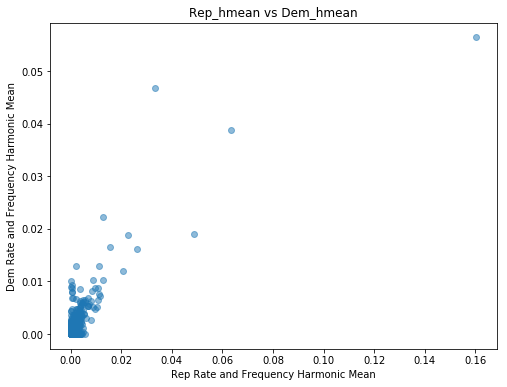

In [65]:
plt.figure(figsize=(8,6))
ax = sns.regplot(x="rep_hmean", y="dem_hmean",fit_reg=False, scatter_kws={'alpha':0.5},data=term_freq_df2)
plt.ylabel('Dem Rate and Frequency Harmonic Mean')
plt.xlabel('Rep Rate and Frequency Harmonic Mean')
plt.title('Rep_hmean vs Dem_hmean')

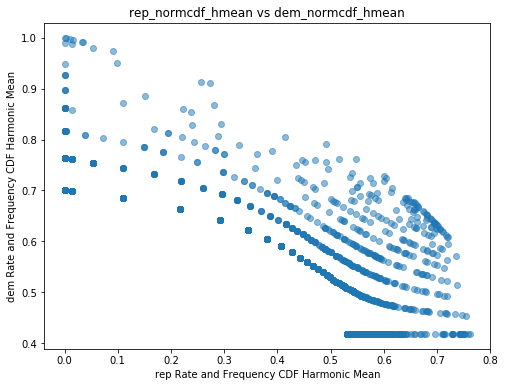

In [75]:
plt.figure(figsize=(8,6))
ax = sns.regplot(x="rep_normcdf_hmean", y="dem_normcdf_hmean",fit_reg=False, scatter_kws={'alpha':0.5},data=term_freq_df2)
plt.ylabel('dem Rate and Frequency CDF Harmonic Mean')
plt.xlabel('rep Rate and Frequency CDF Harmonic Mean')
plt.title('rep_normcdf_hmean vs dem_normcdf_hmean')
plt.show()

In [76]:
print ('If a data point is near to upper left corner, it is more likely from a tweet at the democratic party controlled state, and if it is closer to the bottom right corner, it is more likely from the republican controlled state.')

If a data point is near to upper left corner, it is more likely from a tweet at the democratic party controlled state, and if it is closer to the bottom right corner, it is more likely from the republican controlled state.


In [22]:
from sklearn.model_selection import train_test_split
SEED = 2000
x_train, x_validation_and_test, y_train, y_validation_and_test = train_test_split(x, y, test_size=.02, random_state=SEED)
x_validation, x_test, y_validation, y_test = train_test_split(x_validation_and_test, y_validation_and_test, test_size=.5, random_state=SEED)

In [23]:

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from time import time

In [24]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

In [25]:
def accuracy_summary(pipeline, x_train, y_train, x_test, y_test):
    if len(x_test[y_test == 0]) / (len(x_test)*1.) > 0.5:
        null_accuracy = len(x_test[y_test == 0]) / (len(x_test)*1.)
    else:
        null_accuracy = 1. - (len(x_test[y_test == 0]) / (len(x_test)*1.))
    t0 = time()
    sentiment_fit = pipeline.fit(x_train, y_train)
    y_pred = sentiment_fit.predict(x_test)
    train_test_time = time() - t0
    accuracy = accuracy_score(y_test, y_pred)
    print ("null accuracy", null_accuracy*100)
    print ("accuracy score:",accuracy*100)
    return accuracy, train_test_time

In [26]:
cvec = CountVectorizer()
lr = LogisticRegression()
n_features = np.arange(10000,100001,10000)

def nfeature_accuracy_checker(vectorizer=cvec, n_features=n_features, stop_words=None, ngram_range=(1, 1), classifier=lr):
    result = []
    print (classifier)
    print ("\n")
    for n in n_features:
        vectorizer.set_params(stop_words=stop_words, max_features=n, ngram_range=ngram_range)
        checker_pipeline = Pipeline([
            ('vectorizer', vectorizer),
            ('classifier', classifier)
        ])
        print ("Validation result for",n, "features")
        nfeature_accuracy,tt_time = accuracy_summary(checker_pipeline, x_train, y_train, x_validation, y_validation)
        result.append((n,nfeature_accuracy,tt_time))
    return result

In [27]:
%%time
print ("RESULT FOR UNIGRAM WITHOUT STOP WORDS")
feature_result_wosw = nfeature_accuracy_checker(stop_words='english')

RESULT FOR UNIGRAM WITHOUT STOP WORDS
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)


Validation result for 10000 features
null accuracy 84.24657534246576
accuracy score: 86.3013698630137
Validation result for 20000 features


c:\users\yizhe\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


null accuracy 84.24657534246576
accuracy score: 86.3013698630137
Validation result for 30000 features
null accuracy 84.24657534246576
accuracy score: 86.3013698630137
Validation result for 40000 features
null accuracy 84.24657534246576
accuracy score: 86.3013698630137
Validation result for 50000 features
null accuracy 84.24657534246576
accuracy score: 86.3013698630137
Validation result for 60000 features
null accuracy 84.24657534246576
accuracy score: 86.3013698630137
Validation result for 70000 features
null accuracy 84.24657534246576
accuracy score: 86.3013698630137
Validation result for 80000 features
null accuracy 84.24657534246576
accuracy score: 86.3013698630137
Validation result for 90000 features
null accuracy 84.24657534246576
accuracy score: 86.3013698630137
Validation result for 100000 features
null accuracy 84.24657534246576
accuracy score: 86.3013698630137
Wall time: 2.79 s


In [28]:
print ("RESULT FOR UNIGRAM WITH STOP WORDS\n")
feature_result_ug = nfeature_accuracy_checker()

RESULT FOR UNIGRAM WITH STOP WORDS

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)


Validation result for 10000 features
null accuracy 84.24657534246576
accuracy score: 84.24657534246576
Validation result for 20000 features
null accuracy 84.24657534246576
accuracy score: 84.93150684931507
Validation result for 30000 features
null accuracy 84.24657534246576
accuracy score: 84.93150684931507
Validation result for 40000 features
null accuracy 84.24657534246576
accuracy score: 84.93150684931507
Validation result for 50000 features
null accuracy 84.24657534246576
accuracy score: 84.93150684931507
Validation result for 60000 features
null accuracy 84.24657534246576
accuracy score: 84.93150684931507
Validation result for 70000 features
null accuracy 84.24657534246576
accuracy sc